# <p style="text-align:center;">Time Series Analysis for Power Spot Price Forecasting</p>
This notebook explores time series analysis techniques for electricity spot price forecasting. We will load the data, visualize trends, check for stationarity, and prepare the data for modeling.

In [111]:
# Import required libraries for time series analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [112]:
# Load the spot price time series data
X_train = pd.read_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\data\preprocessed_data\X_train.csv", index_col=0, parse_dates=True)
Y_train = pd.read_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\data\preprocessed_data\Y_train.csv", index_col=0, parse_dates=True)
X_test = pd.read_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\data\preprocessed_data\X_test.csv", index_col=0, parse_dates=True)
y_random = pd.read_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\data\y_random.csv")

In [113]:
X_train.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,month,day,hour,weekday,is_weekend,peak_hours,period,is_holiday,is_dst
DELIVERY_START,,,,,,,,,,,,,,,,,
2022-01-01 01:00:00+00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,1,1,1,5,1,0,3,1,0
2022-01-01 02:00:00+00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,1,1,2,5,1,0,3,1,0
2022-01-01 03:00:00+00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,1,1,3,5,1,0,3,1,0
2022-01-01 04:00:00+00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,1,1,4,5,1,0,3,1,0
2022-01-01 05:00:00+00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,1,1,5,5,1,0,3,1,0


In [114]:
Y_train.index = pd.DatetimeIndex(Y_train.index)
Y_train.index.freq = pd.infer_freq(Y_train.index)

In [115]:
Y_train.head()

,spot_id_delta
DELIVERY_START,
2022-01-01 01:00:00+00:00,-36.874770
2022-01-01 02:00:00+00:00,-12.643588
2022-01-01 03:00:00+00:00,-1.950193
2022-01-01 04:00:00+00:00,1.938272
2022-01-01 05:00:00+00:00,0.199907


## Visualize the Spot Price Time Series
Let's plot the spot price over time to observe trends, seasonality, and potential anomalies.

In [116]:
print("Mean of Y_train:", Y_train['spot_id_delta'].mean())

Mean of Y_train: 0.9433581668879994


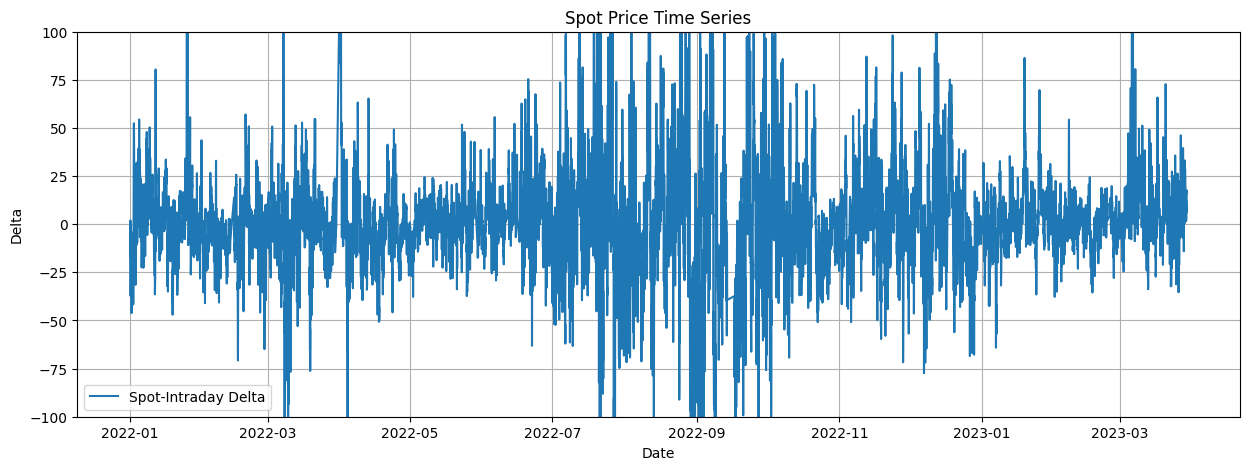

In [117]:
# Plot the spot price time series
plt.figure(figsize=(15, 5))
plt.plot(Y_train.index, Y_train['spot_id_delta'], label='Spot-Intraday Delta')
plt.xlabel('Date')
plt.ylabel('Delta')
plt.title('Spot Price Time Series')
plt.legend()
plt.grid(True)
plt.ylim([-100, 100])
plt.show()

In [118]:
# Supposons que ta série est dans une variable pandas Series `serie`
result = adfuller(Y_train['spot_id_delta'], maxlag=24*31,autolag=None)

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Nombre de lags utilisés:", result[2])
print("Nombre d’observations utilisées:", result[3])

print('\nOn rejette l’hypothèse nulle, on a donc une série stationnaire' if result[1] < 0.05 else '\n On ne rejette pas l’hypothèse nulle')

ADF Statistic: -3.124285159662421
p-value: 0.0248074031981356
Nombre de lags utilisés: 744
Nombre d’observations utilisées: 9860

On rejette l’hypothèse nulle, on a donc une série stationnaire


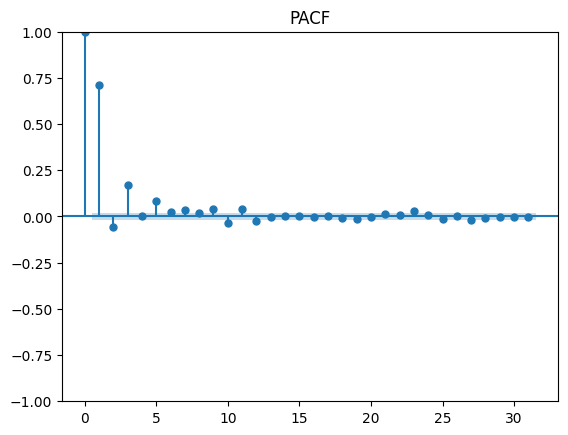

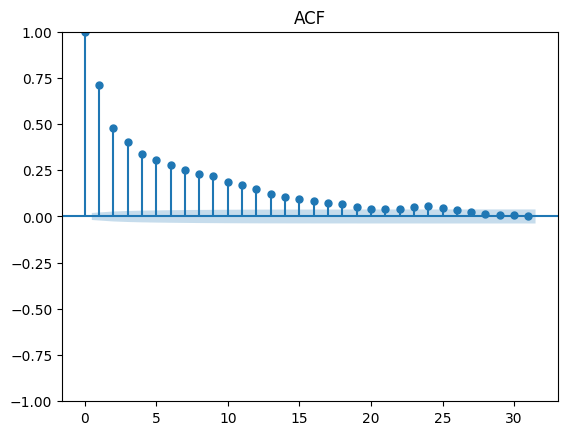

In [119]:
plot_pacf(Y_train['spot_id_delta'], lags=31)
plt.title("PACF")
plt.show()

plot_acf(Y_train['spot_id_delta'], lags=31)
plt.title("ACF")
plt.show()


c:\Users\arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


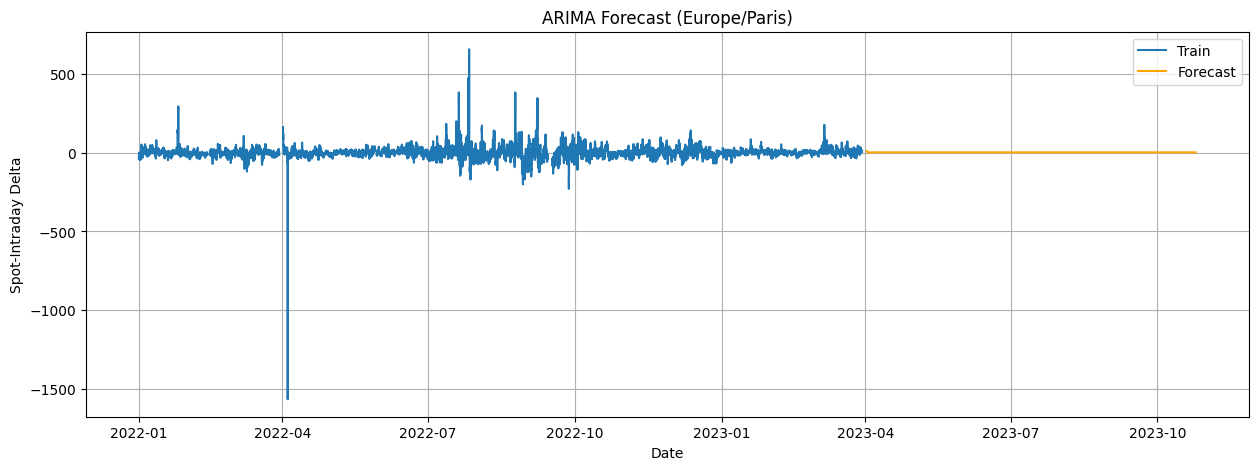

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

Y_train = Y_train.copy()
Y_train.index = pd.to_datetime(Y_train.index)

# Properly handle timezone (Europe/Paris)
if Y_train.index.tz is None:
    Y_train.index = Y_train.index.tz_localize('UTC').tz_convert('Europe/Paris')
else:
    Y_train.index = Y_train.index.tz_convert('Europe/Paris')

# Remove timezone for statsmodels compatibility
Y_train.index = Y_train.index.tz_localize(None)

# Fix the frequency
Y_train = Y_train.asfreq('h')

p, d, q = 5, 1, 21
model = ARIMA(Y_train['spot_id_delta'], order=(p, d, q))
model_fit = model.fit()

X_test = X_test.copy()
X_test.index = pd.to_datetime(X_test.index)

if X_test.index.tz is None:
    X_test.index = X_test.index.tz_localize('UTC').tz_convert('Europe/Paris')
else:
    X_test.index = X_test.index.tz_convert('Europe/Paris')

X_test.index = X_test.index.tz_localize(None)
X_test = X_test.asfreq('h')

n_forecast = len(X_test)
forecast = model_fit.forecast(steps=n_forecast)
forecast.index = X_test.index

plt.figure(figsize=(15, 5))
plt.plot(Y_train.index, Y_train['spot_id_delta'], label='Train')
plt.plot(forecast.index, forecast, label='Forecast', color='orange')
plt.xlabel('Date')
plt.ylabel('Spot-Intraday Delta')
plt.title('ARIMA Forecast (Europe/Paris)')
plt.legend()
plt.grid(True)
plt.show()



In [121]:
y_output_reg_CV = y_random.copy()
y_output_reg_CV['spot_id_delta'] = forecast
y_output_reg_CV.head()
y_output_reg_CV.to_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\output\arima_forecast.csv", index=False)

# VAR

In [130]:
# Load the spot price time series data
X_train = pd.read_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\data\preprocessed_data\X_train.csv", index_col=0, parse_dates=True)
Y_train = pd.read_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\data\preprocessed_data\Y_train.csv", index_col=0, parse_dates=True)
X_test = pd.read_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\data\preprocessed_data\X_test.csv", index_col=0, parse_dates=True)
y_random = pd.read_csv(r"C:\Users\arman\Desktop\Power_Spot_Price_Forecasting\data\y_random.csv")
XY_train = X_train.join(Y_train['spot_id_delta'])
XY_train.head()

,load_forecast,coal_power_available,gas_power_available,nucelear_power_available,wind_power_forecasts_average,solar_power_forecasts_average,wind_power_forecasts_std,solar_power_forecasts_std,month,day,hour,weekday,is_weekend,peak_hours,period,is_holiday,is_dst,spot_id_delta
DELIVERY_START,,,,,,,,,,,,,,,,,,
2022-01-01 01:00:00+00:00,49439.0,3386.0,11487.0,44118.0,3035.0,0.0,79.248348,0.0,1,1,1,5,1,0,3,1,0,-36.874770
2022-01-01 02:00:00+00:00,46511.0,3386.0,11487.0,44118.0,3143.0,0.0,61.776532,0.0,1,1,2,5,1,0,3,1,0,-12.643588
2022-01-01 03:00:00+00:00,45158.0,3386.0,11487.0,44118.0,3288.0,0.0,44.291112,0.0,1,1,3,5,1,0,3,1,0,-1.950193
2022-01-01 04:00:00+00:00,44779.0,3386.0,11487.0,44118.0,3447.0,0.0,36.127588,0.0,1,1,4,5,1,0,3,1,0,1.938272
2022-01-01 05:00:00+00:00,45284.0,3386.0,11487.0,44118.0,3679.0,0.0,30.983023,0.0,1,1,5,5,1,0,3,1,0,0.199907


ADF Test for 'load_forecast': p-value = 0.0021
ADF Test for 'coal_power_available': p-value = 0.0264
ADF Test for 'coal_power_available': p-value = 0.0264
ADF Test for 'gas_power_available': p-value = 0.0566
ADF Test for 'gas_power_available': p-value = 0.0566
ADF Test for 'nucelear_power_available': p-value = 0.3366
ADF Test for 'nucelear_power_available': p-value = 0.3366
ADF Test for 'wind_power_forecasts_average': p-value = 0.0000
ADF Test for 'wind_power_forecasts_average': p-value = 0.0000
ADF Test for 'solar_power_forecasts_average': p-value = 0.0002
ADF Test for 'solar_power_forecasts_average': p-value = 0.0002
ADF Test for 'wind_power_forecasts_std': p-value = 0.0000
ADF Test for 'wind_power_forecasts_std': p-value = 0.0000
ADF Test for 'solar_power_forecasts_std': p-value = 0.0000
ADF Test for 'solar_power_forecasts_std': p-value = 0.0000
ADF Test for 'spot_id_delta': p-value = 0.0000
ADF Test for 'spot_id_delta': p-value = 0.0000


c:\Users\arman\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Lag optimal (selon AIC) : 15
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 14, Jul, 2025
Time:                     20:35:47
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    84.1107
Nobs:                     10589.0    HQIC:                   83.5542
Log likelihood:          -574879.    FPE:                1.45872e+36
AIC:                      83.2706    Det(Omega_mle):     1.30044e+36
--------------------------------------------------------------------
Results for equation load_forecast
                                       coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------------
const                                     0.911346        11.502581            0.079           0.937
L1.load_forecast                          0

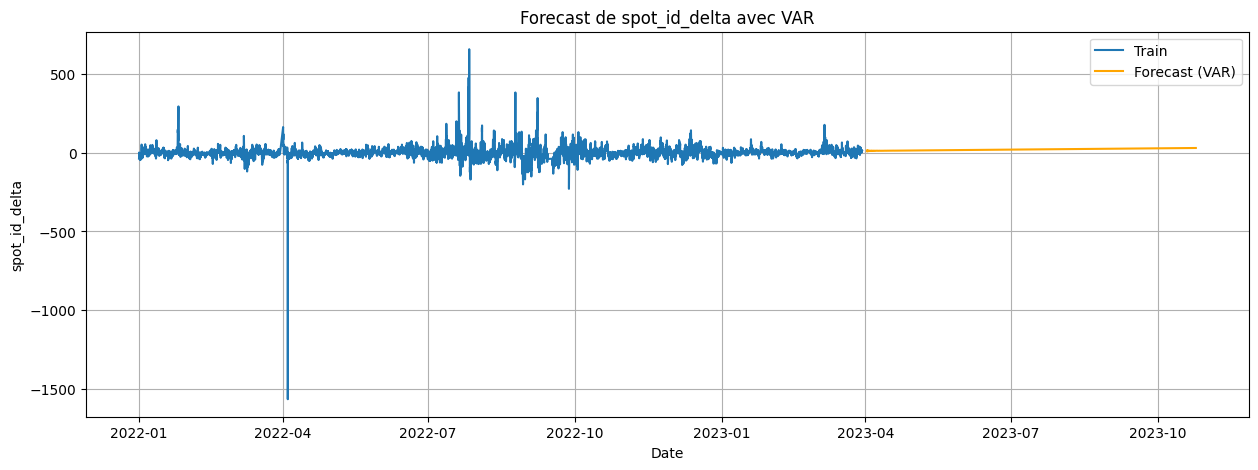

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

def prepare_index(df):
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    if df.index.tz is not None:
        df.index = df.index.tz_localize(None)
    return df

XY_train = prepare_index(XY_train)

cols_to_use = ['load_forecast', 'coal_power_available', 'gas_power_available',
       'nucelear_power_available', 'wind_power_forecasts_average',
       'solar_power_forecasts_average', 'wind_power_forecasts_std',
       'solar_power_forecasts_std', 'spot_id_delta']
df = XY_train[cols_to_use].dropna()

def test_stationarity(series, name):
    result = adfuller(series.dropna())
    p_value = result[1]
    print(f"ADF Test for '{name}': p-value = {p_value:.4f}")
    return p_value < 0.05

diff_needed = {}
for col in df.columns:
    stationary = test_stationarity(df[col], col)
    diff_needed[col] = not stationary

if any(diff_needed.values()):
    df_diff = df.diff().dropna()
    was_differenced = True
else:
    df_diff = df.copy()
    was_differenced = False

model = VAR(df_diff)
lag_order = model.select_order(maxlags=15)
selected_lag = lag_order.aic
print(f"Optimal lag (AIC): {selected_lag}")

var_model = model.fit(selected_lag)
print(var_model.summary())

n_forecast = len(X_test)
forecast_input = df_diff.values[-selected_lag:]
forecast = var_model.forecast(forecast_input, steps=n_forecast)

forecast_df = pd.DataFrame(forecast, index=X_test.index, columns=df_diff.columns)

if was_differenced:
    last_obs = df.iloc[-1]
    forecast_df = forecast_df.cumsum() + last_obs

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['spot_id_delta'], label='Train')
plt.plot(forecast_df.index, forecast_df['spot_id_delta'], label='Forecast (VAR)', color='orange')
plt.xlabel('Date')
plt.ylabel('spot_id_delta')
plt.title('VAR Forecast for spot_id_delta')
plt.legend()
plt.grid(True)
plt.show()
